In [ ]:
import os
import tensorflow as tf
import keras.backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, LSTM, GRU, Bidirectional, GlobalMaxPooling1D, Lambda, Concatenate, Dense
from keras.models import Model

In [ ]:
def get_mnist(limit=None):
  df = pd.read_csv('/content/drive/MyDrive/Handwritten digits dataset/train.csv')
  data = df.values
  np.random.shuffle(data)
  X = data[:, 1:].reshape(-1, 28, 28) / 255.0 # data is from 0..255
  Y = data[:, 0]
  if limit is not None:
    X, Y = X[:limit], Y[:limit]
  return X, Y


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Handwritten digits dataset/train.csv')
# data = df.values

In [ ]:
# df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# data[:5]

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# data.shape

(42000, 785)

In [ ]:
# get data
X, Y = get_mnist()

In [ ]:
# config
D = 28
M = 15




In [ ]:
# input is an image of size 28x28
input_ = Input(shape=(D, D))

In [ ]:
# up-down
rnn1 = Bidirectional(LSTM(M, return_sequences=True))
x1 = rnn1(input_)    #output is NxDx2M
x1 = GlobalMaxPooling1D()(x1)     # output is Nx2M

In [ ]:
# left-right
rnn2 = Bidirectional(LSTM(M, return_sequences=True))

# custom layer
# This is done to switch the width and height dimensions of the image.
permutor = Lambda(lambda t: K.permute_dimensions(t, pattern=(0,2,1)))

x2 = permutor(input_)
x2 = rnn2(x2)       #output is NxDx2M
x2 = GlobalMaxPooling1D()(x2)     # output is Nx2M

# put them together
concatenator = Concatenate(axis=1)
x = concatenator([x1, x2])   #output is N x 4M

# final dense layer
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_, outputs=output)



In [ ]:
# testing
# o = model.predict(X)
# print("o.shape:", o.shape)

# compile
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = model.fit(X, Y, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
919/919 [==============================] - 81s 79ms/step - loss: 0.7539 - accuracy: 0.8069 - val_loss: 0.2955 - val_accuracy: 0.9256
Epoch 2/10
919/919 [==============================] - 67s 73ms/step - loss: 0.2292 - accuracy: 0.9371 - val_loss: 0.1821 - val_accuracy: 0.9502
Epoch 3/10
919/919 [==============================] - 50s 54ms/step - loss: 0.1637 - accuracy: 0.9546 - val_loss: 0.1451 - val_accuracy: 0.9581
Epoch 4/10
919/919 [==============================] - 47s 51ms/step - loss: 0.1326 - accuracy: 0.9614 - val_loss: 0.1224 - val_accuracy: 0.9642
Epoch 5/10
919/919 [==============================] - 48s 52ms/step - loss: 0.1134 - accuracy: 0.9675 - val_loss: 0.1195 - val_accuracy: 0.9623
Epoch 6/10
919/919 [==============================] - 46s 51ms/step - loss: 0.1000 - accuracy: 0.9709 - val_loss: 0.1088 - val_accuracy: 0.9679
Epoch 7/10
919/919 [==============================] - 48s 52ms/step - loss: 0.0904 - accuracy: 0.9723 - val_loss: 0.0967 - val_accuracy:

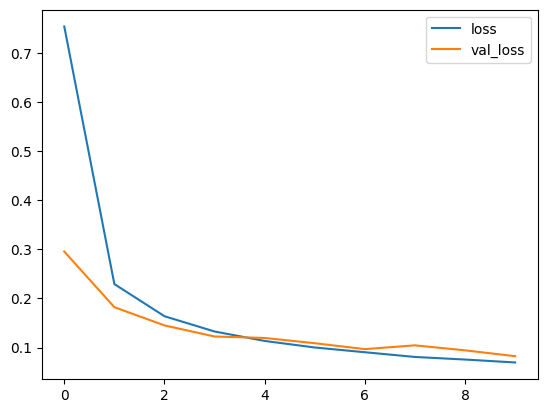

In [ ]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

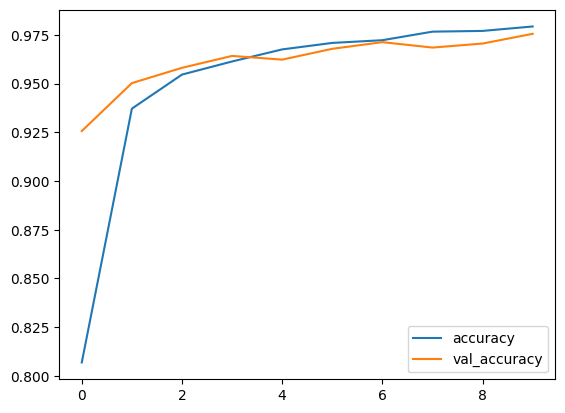

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()